# Loading the Dataset for our project

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

column_names_readable = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes",
    "land", "wrong_fragment", "urgent", "hot", "num_failed_logins",
    "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root",
    "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds",
    "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate",
    "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
    "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
    "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
    "dst_host_rerror_rate", "dst_host_srv_rerror_rate",
    "label", "Difficulty_Level"
]
# Load datasets
train_df = pd.read_csv("Dataset/KDDTraining_dataset.txt", names=column_names_readable)
test_df = pd.read_csv("Dataset/KDDTesting_dataset.txt", names=column_names_readable)


# Drop the 'difficulty_level' column
train_df.drop("Difficulty_Level", axis=1, inplace=True)
test_df.drop("Difficulty_Level", axis=1, inplace=True)


In [7]:

# Display shapes
print("Checking the size of the dataset we have taken for our project")
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

# Check label distributions
print("\nLabel distribution in Training Set:")
print(train_df['label'].value_counts())

print("\nLabel distribution in Testing Set:")
print(test_df['label'].value_counts())


Checking the size of the dataset we have taken for our project
Train shape: (125973, 42)
Test shape: (22544, 42)

Label distribution in Training Set:
label
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

Label distribution in Testing Set:
label
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf    

# 1: Preprocessing

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 1. Encode categorical features
categorical_cols = ['protocol_type', 'service', 'flag']
for col in categorical_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.transform(test_df[col])



# Encoding Labels

In [9]:
from sklearn.preprocessing import LabelEncoder

# Make sure all labels are treated as strings
train_df['label'] = train_df['label'].astype(str)
test_df['label'] = test_df['label'].astype(str)

# Combine labels for consistent LabelEncoder fitting
combined_labels = pd.concat([train_df['label'], test_df['label']])
le_label = LabelEncoder()
le_label.fit(combined_labels)

# Encode labels
train_df['label'] = le_label.transform(train_df['label'])
test_df['label'] = le_label.transform(test_df['label'])

# Store mapping for display / GUI use
label_mapping = dict(zip(le_label.classes_, le_label.transform(le_label.classes_)))
print("✅ Label Mapping:\n", label_mapping)


✅ Label Mapping:
 {'apache2': np.int64(0), 'back': np.int64(1), 'buffer_overflow': np.int64(2), 'ftp_write': np.int64(3), 'guess_passwd': np.int64(4), 'httptunnel': np.int64(5), 'imap': np.int64(6), 'ipsweep': np.int64(7), 'land': np.int64(8), 'loadmodule': np.int64(9), 'mailbomb': np.int64(10), 'mscan': np.int64(11), 'multihop': np.int64(12), 'named': np.int64(13), 'neptune': np.int64(14), 'nmap': np.int64(15), 'normal': np.int64(16), 'perl': np.int64(17), 'phf': np.int64(18), 'pod': np.int64(19), 'portsweep': np.int64(20), 'processtable': np.int64(21), 'ps': np.int64(22), 'rootkit': np.int64(23), 'saint': np.int64(24), 'satan': np.int64(25), 'sendmail': np.int64(26), 'smurf': np.int64(27), 'snmpgetattack': np.int64(28), 'snmpguess': np.int64(29), 'spy': np.int64(30), 'sqlattack': np.int64(31), 'teardrop': np.int64(32), 'udpstorm': np.int64(33), 'warezclient': np.int64(34), 'warezmaster': np.int64(35), 'worm': np.int64(36), 'xlock': np.int64(37), 'xsnoop': np.int64(38), 'xterm': np.in

# Checking for null values

In [10]:

# 3. Check for nulls
print("Checking if there are any null values in the dataset")
print("Nulls in Train:\n", train_df.isnull().sum().sum())
print("Nulls in Test:\n", test_df.isnull().sum().sum())


Checking if there are any null values in the dataset
Nulls in Train:
 0
Nulls in Test:
 0


# EDA & Visualization

# Class distribution in train/test

C:\Users\saira\AppData\Local\Temp\ipykernel_25992\2381474351.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_df['label'], order=train_df['label'].value_counts().index,palette="Set2")


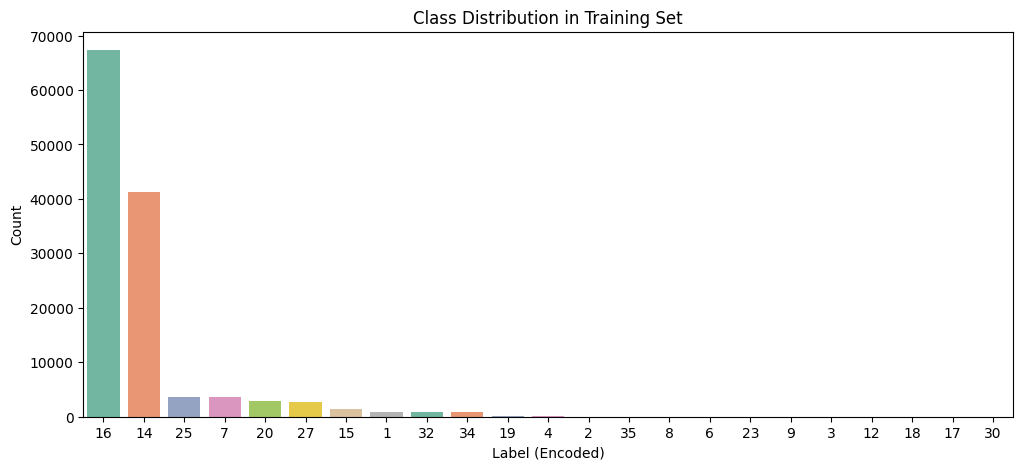

C:\Users\saira\AppData\Local\Temp\ipykernel_25992\2381474351.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=test_df['label'], order=test_df['label'].value_counts().index,palette="Set2")


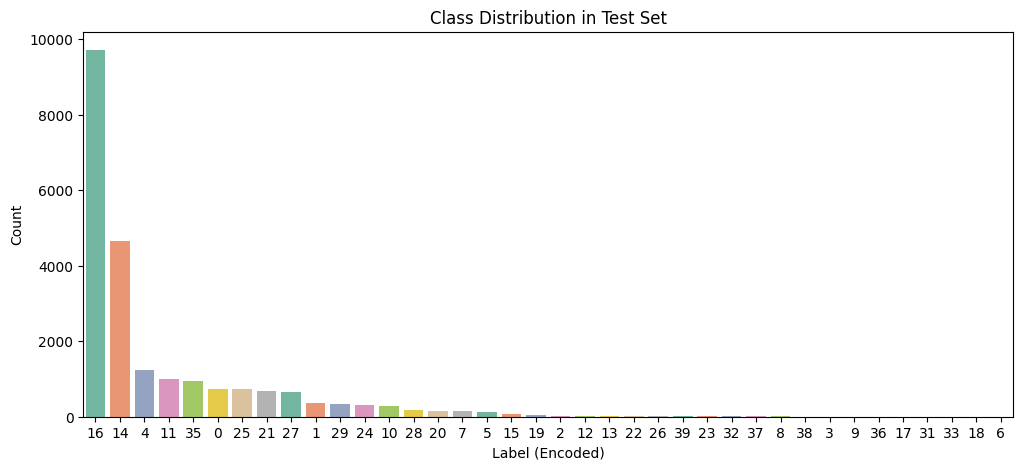

In [11]:
plt.figure(figsize=(12, 5))
sns.countplot(x=train_df['label'], order=train_df['label'].value_counts().index,palette="Set2")
plt.title("Class Distribution in Training Set")
plt.xlabel("Label (Encoded)")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(12, 5))
sns.countplot(x=test_df['label'], order=test_df['label'].value_counts().index,palette="Set2")
plt.title("Class Distribution in Test Set")
plt.xlabel("Label (Encoded)")
plt.ylabel("Count")
plt.show()


# Protocol Type Distribution with "pastel" Palette

C:\Users\saira\AppData\Local\Temp\ipykernel_25992\875767886.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='protocol_type', data=train_df, palette="pastel")
c:\Users\saira\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128752 (\N{SATELLITE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


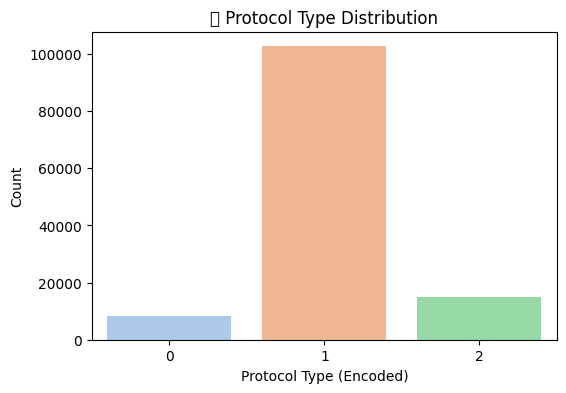

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x='protocol_type', data=train_df, palette="pastel")
plt.title("🛰️ Protocol Type Distribution")
plt.xlabel("Protocol Type (Encoded)")
plt.ylabel("Count")
plt.show()


# Top 10 Service Types with "husl" Palette

C:\Users\saira\AppData\Local\Temp\ipykernel_25992\1128043426.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered, x='service', order=top_services, palette="husl")
c:\Users\saira\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128736 (\N{HAMMER AND WRENCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


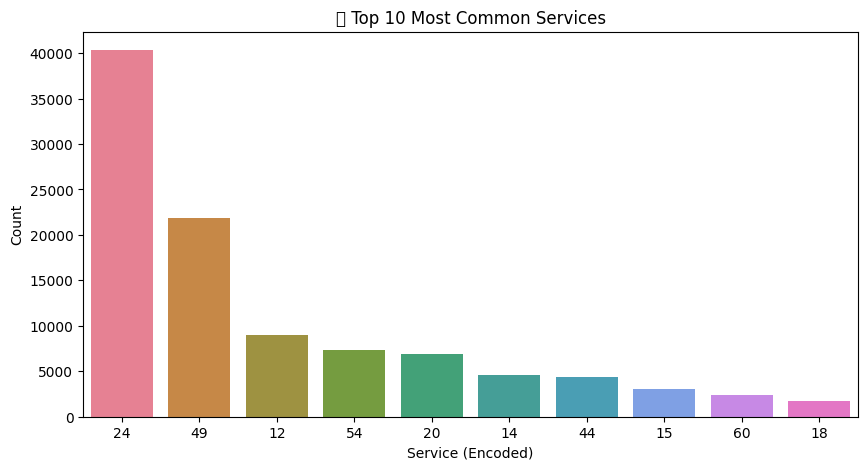

In [13]:
top_services = train_df['service'].value_counts().head(10).index
filtered = train_df[train_df['service'].isin(top_services)]

plt.figure(figsize=(10, 5))
sns.countplot(data=filtered, x='service', order=top_services, palette="husl")
plt.title("🛠️ Top 10 Most Common Services")
plt.xlabel("Service (Encoded)")
plt.ylabel("Count")
plt.show()


# Boxplot of Feature by Class

C:\Users\saira\AppData\Local\Temp\ipykernel_25992\2915091134.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='src_bytes', data=train_df, palette="Set3")
c:\Users\saira\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


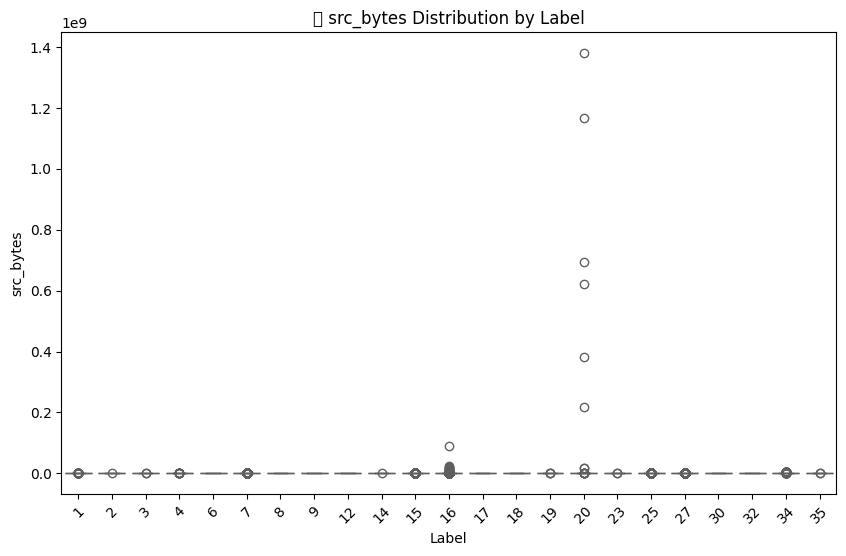

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='src_bytes', data=train_df, palette="Set3")
plt.title("📦 src_bytes Distribution by Label")
plt.xlabel("Label")
plt.ylabel("src_bytes")
plt.xticks(rotation=45)
plt.show()


# Plot with actual attack names on the X-axis

C:\Users\saira\AppData\Local\Temp\ipykernel_25992\1832316445.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label_name', data=train_df_named, order=train_df_named['label_name'].value_counts().index, palette="Set2")
C:\Users\saira\AppData\Local\Temp\ipykernel_25992\1832316445.py:14: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\saira\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


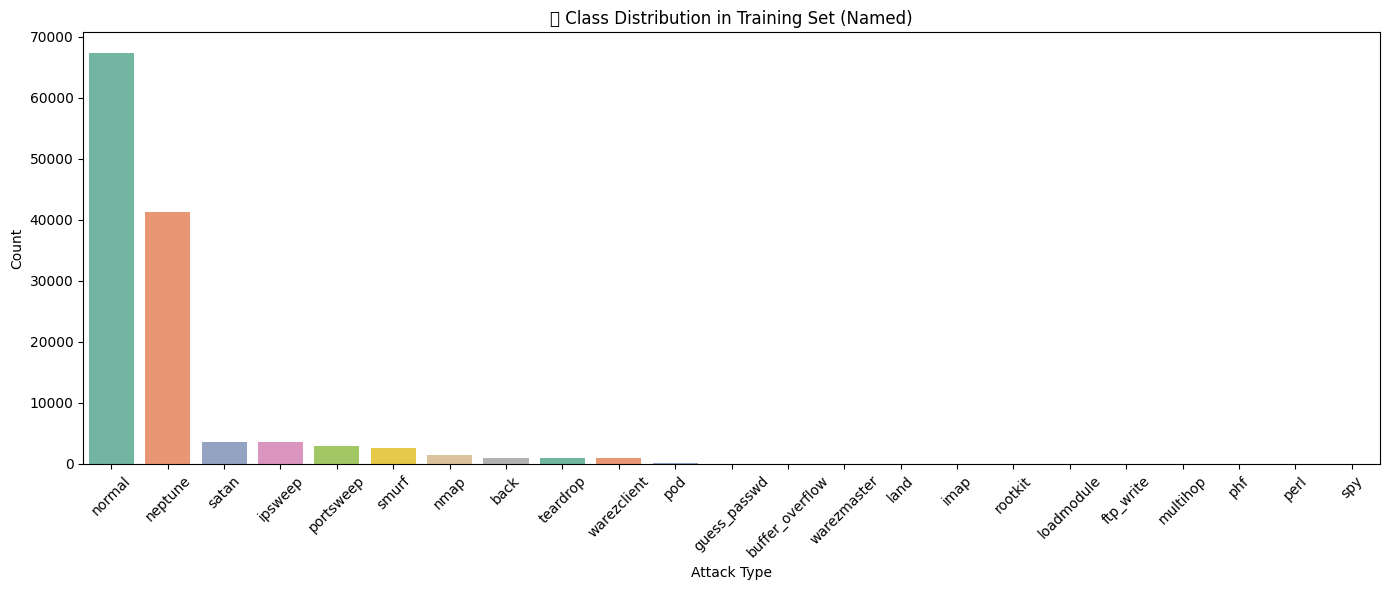

C:\Users\saira\AppData\Local\Temp\ipykernel_25992\1832316445.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label_name', data=test_df_named, order=test_df_named['label_name'].value_counts().index, palette="Set3")
C:\Users\saira\AppData\Local\Temp\ipykernel_25992\1832316445.py:23: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\saira\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


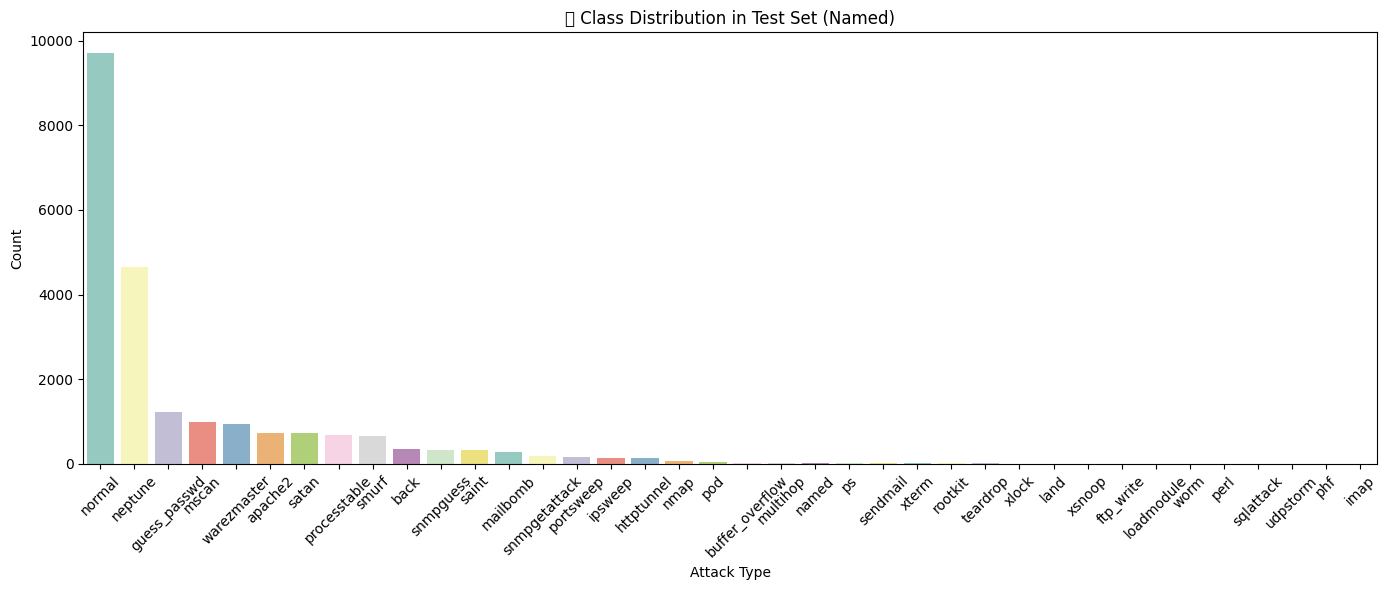

In [15]:

label_mapping = dict(zip(le_label.transform(le_label.classes_), le_label.classes_))

train_df_named = train_df.copy()
test_df_named = test_df.copy()

train_df_named['label_name'] = train_df_named['label'].map(label_mapping)
test_df_named['label_name'] = test_df_named['label'].map(label_mapping)
plt.figure(figsize=(14, 6))
sns.countplot(x='label_name', data=train_df_named, order=train_df_named['label_name'].value_counts().index, palette="Set2")
plt.title("🧠 Class Distribution in Training Set (Named)")
plt.xlabel("Attack Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
sns.countplot(x='label_name', data=test_df_named, order=test_df_named['label_name'].value_counts().index, palette="Set3")
plt.title("🧠 Class Distribution in Test Set (Named)")
plt.xlabel("Attack Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# SelectKBest Feature Selection

In [16]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

# Drop label for X, keep it as y
X_train = train_df.drop("label", axis=1)
y_train = train_df["label"]

# Chi2 needs non-negative data → normalize
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Select top k features (e.g., k=20)
k = 20
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X_train_scaled, y_train)

# Get selected feature names
selected_features = X_train.columns[selector.get_support()].tolist()
print(f"✅ Top {k} Selected Features:\n", selected_features)


✅ Top 20 Selected Features:
 ['land', 'wrong_fragment', 'logged_in', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_srv_rerror_rate']


# Training The Models

#Train + Evaluate Logistic Regression


# Logistic Regression model for our dataset

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Use previously selected features
X = train_df[selected_features]
y = train_df["label"]

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Do the same for test set
X_test = test_df[selected_features]
y_test = test_df["label"]
X_test_scaled = scaler.transform(X_test)


# Training Logistic regression

In [18]:
from sklearn.linear_model import LogisticRegression

# Initialize and train
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_scaled, y)


LogisticRegression(max_iter=1000)

# Evaluation metrics for Logistic regression

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

#  Predict on test set
logistic_regression_predictions = logreg.predict(X_test_scaled)

#  Evaluation Metrics
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_predictions)
logistic_regression_precision = precision_score(y_test, logistic_regression_predictions, average='macro')
logistic_regression_recall = recall_score(y_test, logistic_regression_predictions, average='macro')
logistic_regression_f1 = f1_score(y_test, logistic_regression_predictions, average='macro')

#  False Positive Rate (calculated manually)
cm = confusion_matrix(y_test, logistic_regression_predictions)
FP = cm.sum(axis=0) - np.diag(cm)
TN = cm.sum() - (FP + cm.sum(axis=1) - np.diag(cm) + np.diag(cm))
logistic_regression_fpr = (FP / (FP + TN + 1e-6)).mean()

# ✅ Final Metric Output
print("These are the Evaluation metrics of logistic regression for our Dataset")
print(f" Accuracy of Logistic Regression: {logistic_regression_accuracy:.4f}")
print(f" Precision of Logistic Regression: {logistic_regression_precision:.4f}")
print(f" Recall of Logistic Regression: {logistic_regression_recall:.4f}")
print(f" F1 Score of Logistic Regression: {logistic_regression_f1:.4f}")
print(f" False Positive Rate of Logistic Regression: {logistic_regression_fpr:.4f}")


These are the Evaluation metrics of logistic regression for our Dataset
 Accuracy of Logistic Regression: 0.6771
 Precision of Logistic Regression: 0.1550
 Recall of Logistic Regression: 0.2108
 F1 Score of Logistic Regression: 0.1680
 False Positive Rate of Logistic Regression: 0.0131


# XGboost Training and evalaution

In [20]:
!pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 1.3 MB/s eta 0:01:52
   ---------------------------------------- 0.8/150.0 MB 1.2 MB/s eta 0:02:02
   ---------------------------------------- 1.0/150.0 MB 1.2 MB/s eta 0:02:00
   ---------------------------------------- 1.3/150.0 MB 1.3 MB/s eta 0:01:56
   ---------------------------------------- 1.8/150.0 MB 1.3 MB/s eta 0:01:51
    --------------------------------------- 2.1/150.0 MB 1.4 MB/s eta 0:01:45
    --------------------------------------- 2.4/150.0 MB 1.4 MB/s eta 0:01:42
    --------------------------------------- 2.6/150.0 MB 1.4 MB/s eta 0:01:45
    --------------------------------------- 2.9/150.0 MB 1.4 MB/s eta 0:01:47
    --------------------------------------- 3.1/150.0 MB 1.4 MB/s eta 0:01:44
    ---


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from xgboost import XGBClassifier

# Step 1: Re-encode using only training labels
label_encoder = LabelEncoder()
train_df['label_encoded'] = label_encoder.fit_transform(train_df['label'])

# Get the valid class names
valid_classes = set(train_df['label'])
test_df = test_df[test_df['label'].isin(valid_classes)]
test_df['label_encoded'] = label_encoder.transform(test_df['label'])

# Step 2: Select features and normalize
selected_features = selected_features  # use your SelectKBest list
X_train = train_df[selected_features]
y_train = train_df['label_encoded']

X_test = test_df[selected_features]
y_test = test_df['label_encoded']

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Train XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

# Evaluating XGboost Model for our dataset

In [22]:
# Step 4: Predict & Evaluate
y_pred_xgb = xgb_model.predict(X_test_scaled)

xgboost_accuracy = accuracy_score(y_test, y_pred_xgb)
xgboost_precision = precision_score(y_test, y_pred_xgb, average='macro')
xgboost_recall = recall_score(y_test, y_pred_xgb, average='macro')
xgboost_f1 = f1_score(y_test, y_pred_xgb, average='macro')

# False Positive Rate
cm = confusion_matrix(y_test, y_pred_xgb)
FP = cm.sum(axis=0) - np.diag(cm)
TN = cm.sum() - (FP + cm.sum(axis=1) - np.diag(cm) + np.diag(cm))
xgboost_fpr = (FP / (FP + TN + 1e-6)).mean()

# Results
print("These are the Evaluation metrics of XGboost modelfor our Dataset")
print(f" Accuracy of XGBoost: {xgboost_accuracy:.4f}")
print(f" Precision of XGBoost: {xgboost_precision:.4f}")
print(f" Recall of XGBoost: {xgboost_recall:.4f}")
print(f" F1 Score of XGBoost: {xgboost_f1:.4f}")
print(f" False Positive Rate of XGBoost: {xgboost_fpr:.4f}")


These are the Evaluation metrics of XGboost modelfor our Dataset
 Accuracy of XGBoost: 0.8149
 Precision of XGBoost: 0.3981
 Recall of XGBoost: 0.4017
 F1 Score of XGBoost: 0.3518
 False Positive Rate of XGBoost: 0.0152


# Training the  Random Forest Model

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

# Predicting and evaluating Random forest model

In [24]:
# Predict
rf_predictions = rf_model.predict(X_test_scaled)

# Metrics
random_forest_accuracy = accuracy_score(y_test, rf_predictions)
random_forest_precision = precision_score(y_test, rf_predictions, average='macro')
random_forest_recall = recall_score(y_test, rf_predictions, average='macro')
random_forest_f1 = f1_score(y_test, rf_predictions, average='macro')

# False Positive Rate
cm = confusion_matrix(y_test, rf_predictions)
FP = cm.sum(axis=0) - np.diag(cm)
TN = cm.sum() - (FP + cm.sum(axis=1) - np.diag(cm) + np.diag(cm))
random_forest_fpr = (FP / (FP + TN + 1e-6)).mean()

# Print results
print("These are the Evaluation metrics of Random Forest model for our Dataset")
print(f" Accuracy of Random Forest: {random_forest_accuracy:.4f}")
print(f" Precision of Random Forest: {random_forest_precision:.4f}")
print(f" Recall of Random Forest: {random_forest_recall:.4f}")
print(f" F1 Score of Random Forest: {random_forest_f1:.4f}")
print(f" False Positive Rate of Random Forest: {random_forest_fpr:.4f}")


These are the Evaluation metrics of Random Forest model for our Dataset
 Accuracy of Random Forest: 0.8260
 Precision of Random Forest: 0.4105
 Recall of Random Forest: 0.4087
 F1 Score of Random Forest: 0.3624
 False Positive Rate of Random Forest: 0.0144


# SVM Classifier: Training the support vector machine model

In [25]:
from sklearn.svm import SVC

# Initialize SVM with linear or RBF kernel
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)


SVC(random_state=42)

# Prediction and Evaluation Of SVM model

In [26]:
# Predict
svm_predictions = svm_model.predict(X_test_scaled)

# Evaluation metrics
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions, average='macro')
svm_recall = recall_score(y_test, svm_predictions, average='macro')
svm_f1 = f1_score(y_test, svm_predictions, average='macro')

# False Positive Rate
cm = confusion_matrix(y_test, svm_predictions)
FP = cm.sum(axis=0) - np.diag(cm)
TN = cm.sum() - (FP + cm.sum(axis=1) - np.diag(cm) + np.diag(cm))
svm_fpr = (FP / (FP + TN + 1e-6)).mean()

# Output results
print("These are the Evaluation metrics of Support Vector Machine for our Dataset")
print(f" Accuracy of SVM: {svm_accuracy:.4f}")
print(f" Precision of SVM: {svm_precision:.4f}")
print(f" Recall of SVM: {svm_recall:.4f}")
print(f" F1 Score of SVM: {svm_f1:.4f}")
print(f" False Positive Rate of SVM: {svm_fpr:.4f}")


These are the Evaluation metrics of Support Vector Machine for our Dataset
 Accuracy of SVM: 0.8128
 Precision of SVM: 0.3751
 Recall of SVM: 0.4146
 F1 Score of SVM: 0.3689
 False Positive Rate of SVM: 0.0157


# Comparison of Evalution Metrics of all the models

In [27]:
# Step 1: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Create DataFrame with all evaluation metrics
data = {
    'Model': ['Logistic Regression', 'XGBoost', 'Random Forest', 'SVM'],
    'Accuracy': [0.6771, 0.8149, 0.8260, 0.8128],
    'Precision': [0.1550, 0.3981, 0.4105, 0.3751],
    'Recall': [0.2108, 0.4017, 0.4087, 0.4146],
    'F1 Score': [0.1680, 0.3518, 0.3624, 0.3689],
    'False Positive Rate': [0.0131, 0.0152, 0.0144, 0.0157]
}

df_metrics = pd.DataFrame(data)

# Step 3: Display the metrics table
print("📋 Model Evaluation Metrics:")
display(df_metrics)


📋 Model Evaluation Metrics:


,Model,Accuracy,Precision,Recall,F1 Score,False Positive Rate
0,Logistic Regression,0.6771,0.1550,0.2108,0.1680,0.0131
1,XGBoost,0.8149,0.3981,0.4017,0.3518,0.0152
2,Random Forest,0.8260,0.4105,0.4087,0.3624,0.0144
3,SVM,0.8128,0.3751,0.4146,0.3689,0.0157


# Visualization of evaluation metrics for models

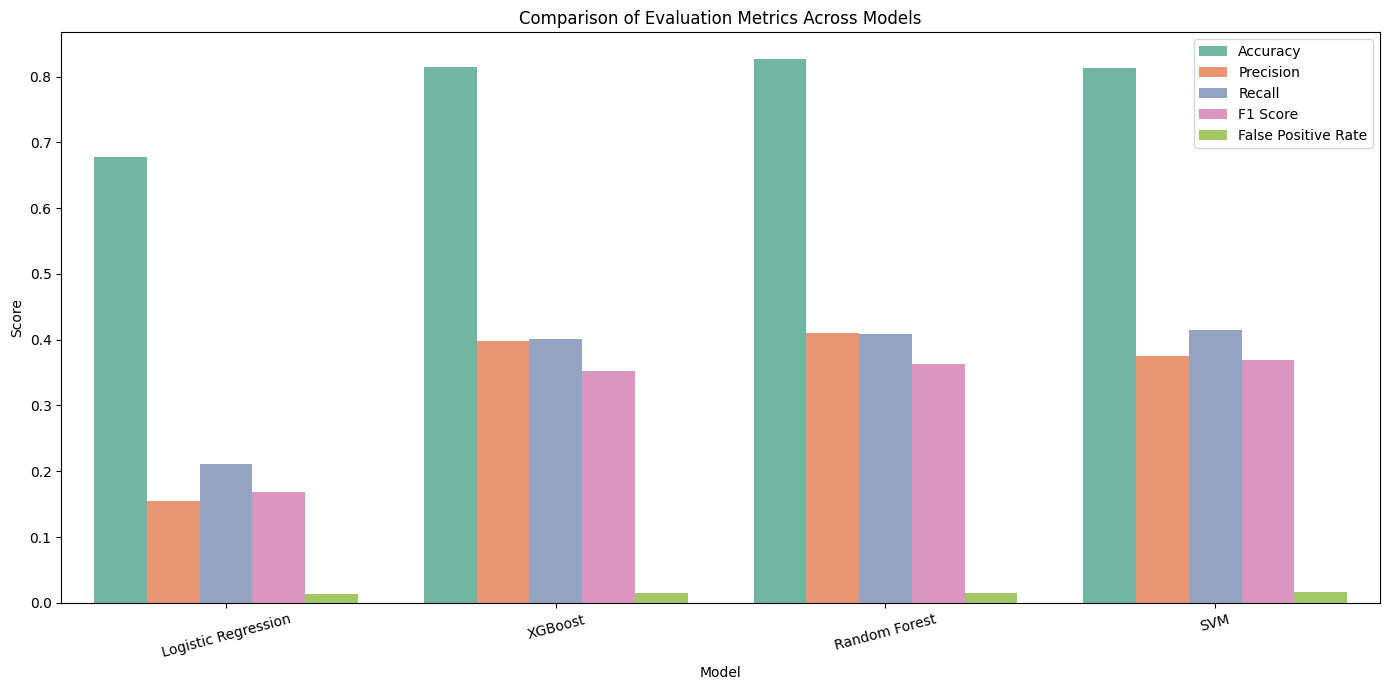

In [28]:

# Step 4: Plot all metrics in one grouped bar chart
df_melted = df_metrics.melt(id_vars='Model', var_name='Metric', value_name='Score')
plt.figure(figsize=(14, 7))
sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric', palette='Set2')
plt.title('Comparison of Evaluation Metrics Across Models')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=15)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


# Radar Chart for Model Comparison

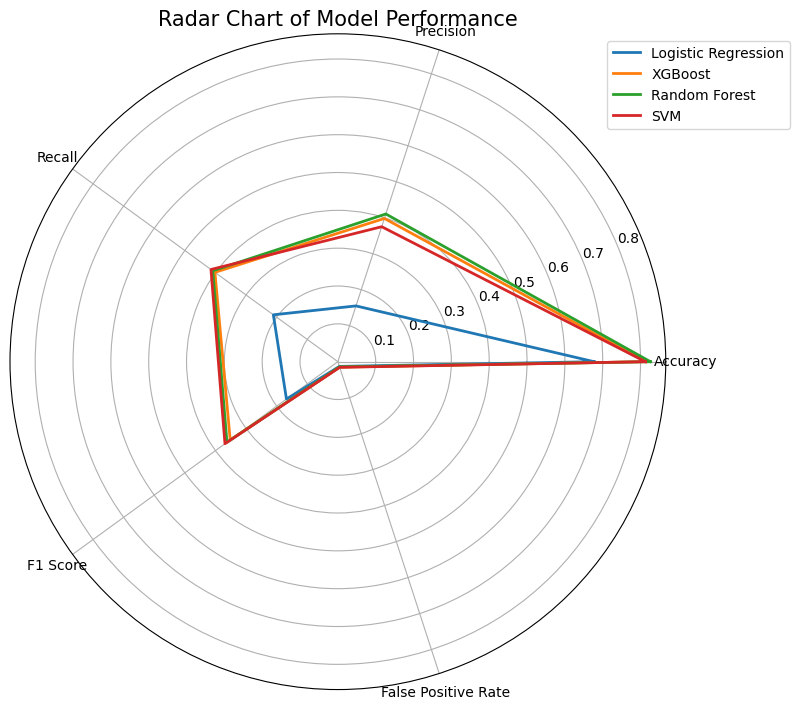

In [29]:
import numpy as np

# Normalize all metric values for radar chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'False Positive Rate']
num_vars = len(metrics)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # loop back to start

# Create radar chart for each model
plt.figure(figsize=(8, 8))
for idx, row in df_metrics.iterrows():
    values = row[metrics].tolist()
    values += values[:1]  # loop back to start
    plt.polar(angles, values, label=row['Model'], linewidth=2)

plt.xticks(angles[:-1], metrics)
plt.title('Radar Chart of Model Performance', size=15)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()


# Horizontal Bar Plot (focused on a single metric like F1 Score)

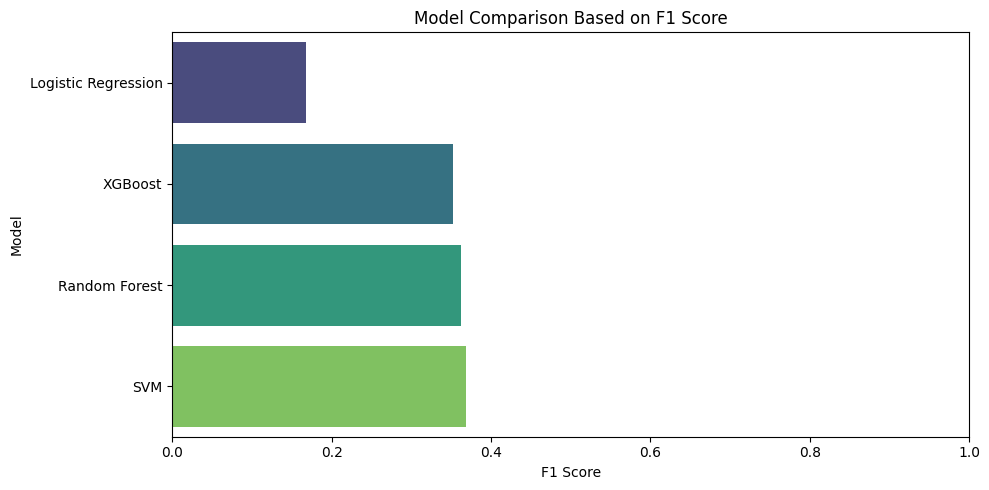

In [30]:
plt.figure(figsize=(10, 5))
sns.barplot(x='F1 Score', y='Model', data=df_metrics, palette='viridis')
plt.title('Model Comparison Based on F1 Score')
plt.xlabel('F1 Score')
plt.ylabel('Model')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


# Testing the models using some samples


In [31]:
# Decode integer labels back to original attack names
label_decoder = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))

In [32]:
# Rebuild label decoder using all classes
from sklearn.preprocessing import LabelEncoder

label_encoder_full = LabelEncoder()
label_encoder_full.fit(pd.concat([train_df['label'], test_df['label']]))

# New decoder dictionary
label_decoder = dict(zip(label_encoder_full.transform(label_encoder_full.classes_), label_encoder_full.classes_))


# Predict on 5 Random Samples

In [33]:
# Pick 5 random indices
import random
sample_indices = random.sample(range(len(X_test_scaled)), 5)

for idx in sample_indices:
    sample = X_test_scaled[idx].reshape(1, -1)
    true_label = int(y_test.iloc[idx])

    pred_logreg = int(logistic_regression_predictions[idx])
    pred_xgb = int(y_pred_xgb[idx])
    pred_rf = int(rf_predictions[idx])
    pred_svm = int(svm_predictions[idx])

    print(f"\n Sample Index in test dataset: {idx}")
    print(f" True Label: {label_decoder[true_label]}")

    print(f" XGBoost Prediction: {label_decoder[pred_xgb]}")
    print(f" Random Forest Prediction: {label_decoder[pred_rf]}")
    print(f" SVM Prediction: {label_decoder[pred_svm]}")



 Sample Index in test dataset: 2551
 True Label: 16
 XGBoost Prediction: 16
 Random Forest Prediction: 16
 SVM Prediction: 16

 Sample Index in test dataset: 9339
 True Label: 4
 XGBoost Prediction: 16
 Random Forest Prediction: 16
 SVM Prediction: 16

 Sample Index in test dataset: 14548
 True Label: 25
 XGBoost Prediction: 25
 Random Forest Prediction: 25
 SVM Prediction: 25

 Sample Index in test dataset: 625
 True Label: 16
 XGBoost Prediction: 16
 Random Forest Prediction: 16
 SVM Prediction: 16

 Sample Index in test dataset: 9876
 True Label: 16
 XGBoost Prediction: 16
 Random Forest Prediction: 16
 SVM Prediction: 16


# Checking the sample Attacks using our models

In [34]:
attack_label_map = {
    '0': 'normal',
    '1': 'back',
    '2': 'buffer_overflow',
    '3': 'ftp_write',
    '4': 'guess_passwd',
    '5': 'imap',
    '6': 'ipsweep',
    '7': 'land',
    '8': 'loadmodule',
    '9': 'multihop',
    '10': 'neptune',
    '11': 'nmap',
    '12': 'perl',
    '13': 'phf',
    '14': 'pod',
    '15': 'portsweep',
    '16': 'rootkit',
    '17': 'satan',
    '18': 'smurf',
    '19': 'spy',
    '20': 'teardrop',
    '21': 'warezclient',
    '22': 'warezmaster',
    '23': 'apache2',
    '24': 'processtable',
    '25': 'udpstorm',
    '26': 'xlock',
    '27': 'xsnoop',
    '28': 'worm',
    '29': 'sqlattack',
    '30': 'snmpgetattack',
    '31': 'snmpguess',
    '32': 'httptunnel',
    '33': 'mscan',
    '34': 'mailbomb',
    '35': 'named'
}
for idx in sample_indices:
    sample = X_test_scaled[idx].reshape(1, -1)
    true_label = str(y_test.iloc[idx])

    pred_logreg = str(logistic_regression_predictions[idx])
    pred_xgb = str(y_pred_xgb[idx])
    pred_rf = str(rf_predictions[idx])
    pred_svm = str(svm_predictions[idx])

    print(f"\n Sample Index: {idx}")
    print(f" True Label: {attack_label_map.get(true_label, true_label)} ({true_label})")
    print(f" Logistic Regression Prediction: {attack_label_map.get(pred_logreg, pred_logreg)} ({pred_logreg})")
    print(f" XGBoost Prediction: {attack_label_map.get(pred_xgb, pred_xgb)} ({pred_xgb})")
    print(f" Random Forest Prediction: {attack_label_map.get(pred_rf, pred_rf)} ({pred_rf})")
    print(f" SVM Prediction: {attack_label_map.get(pred_svm, pred_svm)} ({pred_svm})")



 Sample Index: 2551
 True Label: nmap (11)
 Logistic Regression Prediction: land (7)
 XGBoost Prediction: nmap (11)
 Random Forest Prediction: nmap (11)
 SVM Prediction: nmap (11)

 Sample Index: 9339
 True Label: ftp_write (3)
 Logistic Regression Prediction: rootkit (16)
 XGBoost Prediction: nmap (11)
 Random Forest Prediction: nmap (11)
 SVM Prediction: nmap (11)

 Sample Index: 14548
 True Label: satan (17)
 Logistic Regression Prediction: pod (14)
 XGBoost Prediction: satan (17)
 Random Forest Prediction: satan (17)
 SVM Prediction: satan (17)

 Sample Index: 625
 True Label: nmap (11)
 Logistic Regression Prediction: rootkit (16)
 XGBoost Prediction: nmap (11)
 Random Forest Prediction: nmap (11)
 SVM Prediction: nmap (11)

 Sample Index: 9876
 True Label: nmap (11)
 Logistic Regression Prediction: rootkit (16)
 XGBoost Prediction: nmap (11)
 Random Forest Prediction: nmap (11)
 SVM Prediction: nmap (11)


# Saving the models as pkl for using GUI

In [35]:
import joblib

# Save each model
joblib.dump(logreg, 'logistic_regression_model.pkl')
joblib.dump(xgb_model, 'xgboost_model.pkl')
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(svm_model, 'svm_model.pkl')

# Save the scaler (to use for normalizing inputs in Streamlit)
joblib.dump(scaler, 'minmax_scaler.pkl')


['minmax_scaler.pkl']